In [1]:
import pandas as pd 
%matplotlib inline
import seaborn as sns 
from pylab import *

Using TensorFlow backend.


In [5]:
sp_train = pd.read_csv("data/ref_train_x.csv").drop( columns =["raw_id"])
col_names = sp_train.columns
sp_y_train = pd.read_csv("data/ref_train_y.csv", names = ["Target"])
sp_test = pd.read_csv("data/ref_test_x.csv").drop( columns = ["raw_id"])
sp_val= pd.read_csv("data/ref_valid_x.csv").drop( columns = ["raw_id"])
sp_val.head()

,sector,earnings_implied_obs,delta_vol_1w,delta_vol_1y,return_1w,return_1m,return_1y,implied_vol_3m,realised_vol_1w,realised_vol_1m,...,publication_date_funda,exchange,net_income,shareholders_equity,net_debt,ebitda,ebit,sales,cash_flow,payout_ratio
0,4700,2.4461,0.1735,2.1648,-1.0713,4.8328,11.6924,22.7856,1.180800,1.375023,...,332.0,US,0.053045,0.607667,0.629030,0.188284,0.113513,0.547924,0.164567,67.083333
1,4700,4.7421,-0.0019,-0.8875,-0.0854,-2.9170,26.9056,17.7426,0.707194,0.800064,...,161.0,US,0.049732,0.548312,0.574994,0.169877,0.099385,0.481372,0.149906,63.899614
2,4700,2.6895,0.2251,-3.8361,-2.1077,-1.5320,15.6661,15.8499,0.623590,0.615243,...,65.0,US,0.049070,0.533757,0.588012,0.173886,0.103776,0.456583,0.149013,63.992537
3,1200,3.6157,-2.9473,2.2332,7.0837,0.5461,8.0946,20.5666,1.979139,1.972296,...,244.0,US,0.042230,0.256167,0.091474,0.076270,0.066578,0.293579,0.052240,11.428571
4,1200,3.7540,-0.3427,2.8985,-2.3332,-16.0613,-6.7157,27.3656,1.544946,1.400208,...,346.0,US,0.053010,0.293828,0.121212,0.094071,0.081502,0.364791,0.069170,13.924051


In [12]:
sp_train.columns

Index(['sector', 'earnings_implied_obs', 'delta_vol_1w', 'delta_vol_1y',
       'return_1w', 'return_1m', 'return_1y', 'implied_vol_3m',
       'realised_vol_1w', 'realised_vol_1m', 'realised_vol_1y',
       'ratio_put_call', 'publication_date_funda', 'exchange', 'net_income',
       'shareholders_equity', 'net_debt', 'ebitda', 'ebit', 'sales',
       'cash_flow', 'payout_ratio'],
      dtype='object')

In [6]:
print(f"Total number of samples: {len(sp_train)}")

Total number of samples: 15249


In [7]:
df_train = sp_train.copy()
df_train["Target"]= sp_y_train
df_train.describe()

,sector,earnings_implied_obs,delta_vol_1w,delta_vol_1y,return_1w,return_1m,return_1y,implied_vol_3m,realised_vol_1w,realised_vol_1m,...,publication_date_funda,net_income,shareholders_equity,net_debt,ebitda,ebit,sales,cash_flow,payout_ratio,Target
count,15249.000000,15229.000000,15239.000000,15021.000000,15248.000000,15248.000000,15248.000000,15244.000000,15246.000000,15246.000000,...,15234.000000,15232.000000,15228.000000,15229.000000,13380.000000,13384.000000,15231.000000,15223.000000,15155.000000,15249.000000
mean,3038.146764,4.123989,0.305965,0.714170,0.148589,1.483637,13.256354,26.903479,1.452244,1.504748,...,206.854011,0.034064,0.498687,0.644835,0.136042,0.085556,0.993146,0.118811,71.237165,0.267690
std,1314.944072,2.524939,3.679804,9.630336,3.754969,7.425006,25.285679,10.264673,0.827564,0.829296,...,106.594922,0.478796,0.535053,3.891682,0.148875,0.111803,1.454851,0.326089,574.784253,0.442769
min,1100.000000,0.034300,-102.059100,-297.204800,-102.875600,-50.447900,-186.668800,5.070000,0.141037,0.128684,...,4.000000,-53.872876,-16.984842,-10.718349,-5.507148,-6.746918,-0.186518,-1.730255,0.000000,0.000000
25%,2100.000000,2.765700,-0.677250,-2.615200,-1.695175,-2.658975,-0.380800,20.942550,0.946495,1.044182,...,134.000000,0.028509,0.203876,0.019968,0.070662,0.049929,0.304341,0.055226,17.790398,0.000000
50%,3200.000000,3.645000,0.129000,0.890800,0.321100,1.751250,14.078700,24.898550,1.287629,1.347276,...,189.000000,0.046449,0.360802,0.155451,0.104280,0.073895,0.571448,0.084738,36.512262,0.000000
75%,4700.000000,4.878000,1.087100,4.205800,2.163650,5.813400,28.085200,30.333475,1.750571,1.760508,...,321.000000,0.068174,0.646414,0.436791,0.162991,0.106413,1.143283,0.138782,60.169492,1.000000
max,6000.000000,96.156200,297.876900,288.698800,49.581700,103.039800,192.361700,329.046700,26.094069,38.178429,...,931.000000,0.888207,19.549657,362.873617,5.016946,4.711881,33.675033,36.050037,40483.870968,1.000000


In [8]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15249 entries, 0 to 15248
Data columns (total 23 columns):
sector                    15249 non-null int64
earnings_implied_obs      15229 non-null float64
delta_vol_1w              15239 non-null float64
delta_vol_1y              15021 non-null float64
return_1w                 15248 non-null float64
return_1m                 15248 non-null float64
return_1y                 15248 non-null float64
implied_vol_3m            15244 non-null float64
realised_vol_1w           15246 non-null float64
realised_vol_1m           15246 non-null float64
realised_vol_1y           15247 non-null float64
ratio_put_call            15154 non-null float64
publication_date_funda    15234 non-null float64
exchange                  15249 non-null object
net_income                15232 non-null float64
shareholders_equity       15228 non-null float64
net_debt                  15229 non-null float64
ebitda                    13380 non-null float64
ebit        

In [9]:
100*df_train.isna().sum()/len(df_train)

sector                     0.000000
earnings_implied_obs       0.131156
delta_vol_1w               0.065578
delta_vol_1y               1.495180
return_1w                  0.006558
return_1m                  0.006558
return_1y                  0.006558
implied_vol_3m             0.032789
realised_vol_1w            0.019673
realised_vol_1m            0.019673
realised_vol_1y            0.013116
ratio_put_call             0.622992
publication_date_funda     0.098367
exchange                   0.000000
net_income                 0.111483
shareholders_equity        0.137714
net_debt                   0.131156
ebitda                    12.256541
ebit                      12.230310
sales                      0.118041
cash_flow                  0.170503
payout_ratio               0.616434
Target                     0.000000
dtype: float64

**Remarque**  As we can see there are a lot of missing values. Let's first fill these values using K Nearnerst Neighboors imputer.


In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train["exchange"] = le.fit_transform(df_train["exchange"])


In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(df_train)
df_filled = preprocessing.StandardScaler().fit_transform(df_filled)


In [14]:
df_p = pd.DataFrame(df_filled, columns=df_train.columns); 
df_p["exchange"] = df_train["exchange"] # categorical
df_p["sector"]= df_train["sector"]  # categorical
df_p["Target"] = sp_y_train; df_p.head(3)

,sector,earnings_implied_obs,delta_vol_1w,delta_vol_1y,return_1w,return_1m,return_1y,implied_vol_3m,realised_vol_1w,realised_vol_1m,...,exchange,net_income,shareholders_equity,net_debt,ebitda,ebit,sales,cash_flow,payout_ratio,Target
0,4700,-0.149878,-0.183492,-0.084173,0.556348,-0.045019,0.349952,-0.948229,-0.803235,-0.748458,...,1,-0.033193,0.959266,0.071839,1.184700,1.004863,0.004849,0.388602,0.333115,0
1,4700,-0.364892,-0.246451,-0.010001,0.841935,-0.017906,0.171702,-1.067004,-0.620218,-0.810111,...,1,0.065589,0.935095,0.049292,1.005031,0.789141,-0.029252,0.327551,0.000251,0
2,4700,0.134998,0.358546,-0.638807,-0.222910,-0.516510,-0.276235,-1.017633,-0.594958,-0.953209,...,1,0.066110,0.942210,0.050111,1.012447,0.795215,-0.026761,0.330187,0.000251,0


In [16]:
assert df_p["Target"].isna().sum() ==0
df_p["Target"].value_counts()*100/len(df_p)


0    73.231032
1    26.768968
Name: Target, dtype: float64

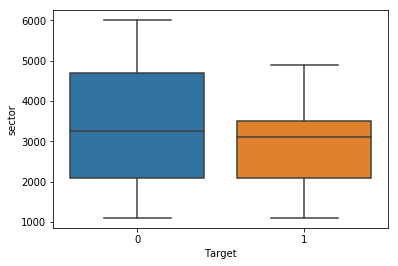

In [20]:
sns.boxplot(x="Target", y="sector", data=df_p)


In [23]:
df_p.to_csv("data/processed_data.csv")

In [25]:
x_train = df_p.drop(columns="Target"); x_train.head()
y_train = df_p['Target']

In [ ]:
from sklearn.manifold import TSNE
data, y = x_train, y_train
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(x_train)
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


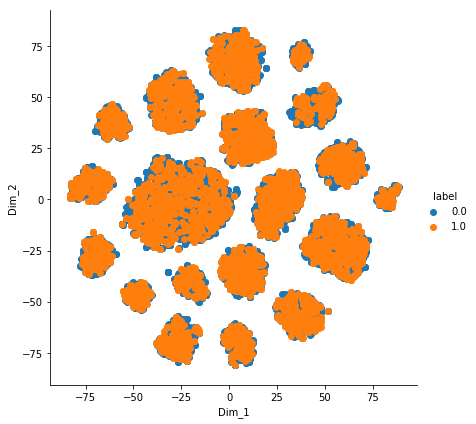

In [29]:
import seaborn as sn
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

### Conclusion : 
The dataset seems to be highly unbalanced. I will try to deal with that using two simple stratagies : class_weights and oversampling.
